# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
banner id:          904123456
verification code:  5e0dcb416f37

```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2714 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1001,2025-11-11 06:26:00,Suburb,112,1.0,3.08,Credit,True
1,1003,2025-11-11 06:32:00,Downtown,104,1.0,2.63,Credit,False
2,1000,2025-11-11 06:42:00,Campus,105,1.0,3.10,Credit,True
3,1002,2025-11-11 06:49:00,Campus,104,1.0,2.31,Mobile,False
4,1016,2025-11-11 07:04:00,Campus,106,1.0,7.50,Mobile,False


In [3]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [6]:
# Task 1: use isna(), nunique(), min/max on timestamp
sales.isna().sum()

transaction_id    0
timestamp         0
location          0
product_id        0
quantity          6
revenue           2
payment_method    0
loyalty_member    0
dtype: int64

There are 6 missing values in the quantity column.

There are 2 missing values in the quantity column.

In [7]:
products.isna().sum()

product_id    0
name          0
category      0
cost          0
dtype: int64

In [10]:
sales['product_id'].nunique()

21

In [11]:
products['product_id'].nunique()

18

There are 21 unique product IDs in the 'sales' dataset. 
There are 18 products in the catalog. 

In [14]:
#The list of uniquie product ids
sales['product_id'].unique()

array([112, 104, 105, 106, 108, 111, 109, 113, 101, 103, 107, 114, 102,
       115, 116, 118, 110, 117, 200, 201, 199])

In [15]:
#The list of uniquie product ids
products['product_id'].unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118])

The items in sales that are not included in the products df are 199, 200, and 201

In [17]:
earliest = sales['timestamp'].min() #earliest transaction in the sales dataframe
print(earliest)

2025-11-11 06:26:00


In [18]:
latest = sales['timestamp'].max() #latest transaction in the sales dataframe
print(latest)

2025-11-24 21:49:00


In [19]:
#The amount of time between the first transaction and the final transaction
print(latest - earliest)

13 days 15:23:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [21]:
# Task 2: use pd.merge() with appropriate join type
df = pd.merge(sales, products, on='product_id', how='left')

I used Left type in this case in order to retain the 3 additional product ids that were not included in the products catalog. 

## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [23]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2714 entries, 0 to 2713
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  2714 non-null   int64         
 1   timestamp       2714 non-null   datetime64[ns]
 2   location        2714 non-null   object        
 3   product_id      2714 non-null   int64         
 4   quantity        2708 non-null   float64       
 5   revenue         2712 non-null   float64       
 6   payment_method  2714 non-null   object        
 7   loyalty_member  2714 non-null   bool          
 8   name            2699 non-null   object        
 9   category        2699 non-null   object        
 10  cost            2699 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 214.8+ KB


In [24]:
df.shape

(2714, 11)

In [26]:
sales.shape

(2714, 8)

In [25]:
df.isna().sum()

transaction_id     0
timestamp          0
location           0
product_id         0
quantity           6
revenue            2
payment_method     0
loyalty_member     0
name              15
category          15
cost              15
dtype: int64

Name, Category, and Cost all have 15 NaN entries.  

In [27]:
nan_category = df[df['category'].isna()]

In [30]:
nan_category['product_id'].unique()

array([200, 201, 199])

The product IDs that have missing values for name, category, and cost are 199, 200, and 201. 

## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [31]:
# Task 4: create profit column, then groupby with .agg()
df['profit'] = df['revenue'] - (df['cost']*df['quantity'])

In [32]:
df.head()

,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost,profit
0,1001,2025-11-11 06:26:00,Suburb,112,1.0,3.08,Credit,True,Muffin,Pastry,0.9,2.18
1,1003,2025-11-11 06:32:00,Downtown,104,1.0,2.63,Credit,False,Americano,Coffee,1.0,1.63
2,1000,2025-11-11 06:42:00,Campus,105,1.0,3.10,Credit,True,Cold Brew,Coffee,1.5,1.60
3,1002,2025-11-11 06:49:00,Campus,104,1.0,2.31,Mobile,False,Americano,Coffee,1.0,1.31
4,1016,2025-11-11 07:04:00,Campus,106,1.0,7.50,Mobile,False,Nitro Cold Brew,Coffee,2.5,5.00


In [36]:
df.groupby('category')['profit'].agg(['sum', 'count'])

,sum,count
category,,
Coffee,2322.47,968
Pastry,1524.91,529
Sandwich,4210.90,597
Tea,868.41,597


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [42]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()
t_five_table = (df.groupby(['category', 'location']).agg({
    'profit': ['sum', 'mean', 'count']
}).reset_index()
               )
t_five_table.columns = [
    'category', 
    'location',
    'total_profit',
    'average_profit',
    'number_of_transactions',
]

t_five_table

,category,location,total_profit,average_profit,number_of_transactions
0,Coffee,Campus,1064.01,1.966747,541
1,Coffee,Downtown,1042.22,3.029709,344
2,Coffee,Suburb,216.24,2.605301,83
3,Pastry,Campus,568.91,2.462814,231
4,Pastry,Downtown,638.73,3.471359,184
5,Pastry,Suburb,317.27,2.783070,114
6,Sandwich,Campus,846.60,5.644000,150
7,Sandwich,Downtown,2577.56,7.882446,327
8,Sandwich,Suburb,786.74,6.556167,120
9,Tea,Campus,210.26,1.181236,178


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

In [43]:
# Task 6: use sns.barplot() with aggregated data
import seaborn as sns

<Axes: title={'center': 'Total Profit Per Category'}, xlabel='category', ylabel='total_profit'>

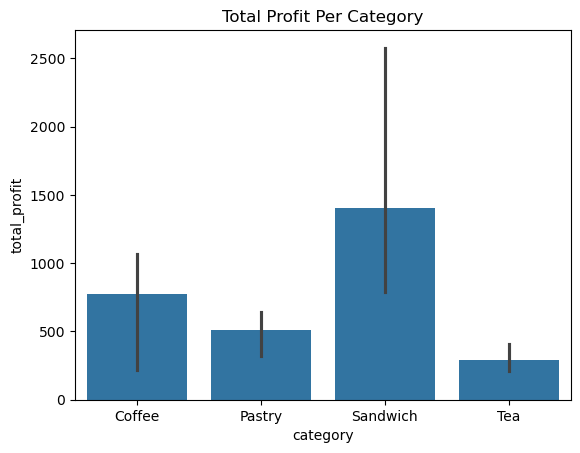

In [53]:
t_six_plot = sns.barplot(data=t_five_table, x='category', y='total_profit')
t_six_plot.set_title("Total Profit Per Category")

t_six_plot

<Axes: title={'center': 'Total Profit Per Category Per Location'}, xlabel='category', ylabel='total_profit'>

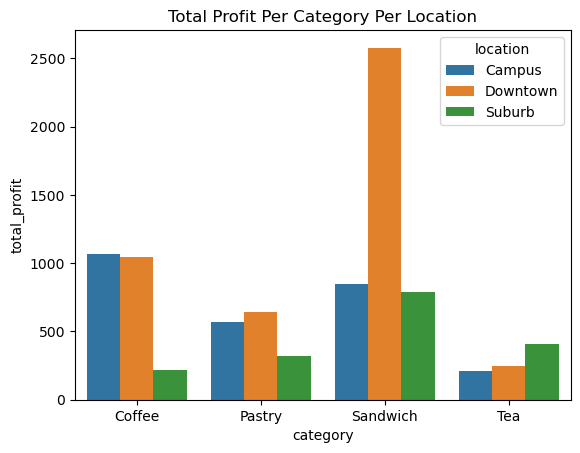

In [52]:
t_six_plot_loc = sns.barplot(data=t_five_table, x='category', y='total_profit', hue='location')
t_six_plot_loc.set_title("Total Profit Per Category Per Location")

t_six_plot_loc

The first bar chart clearly shows the Sandwich is the most profitable item. The second chart shows the sandwich is most profitable on downtown. Without the downtown location, coffee would be almost as profitable as the sandwich.  

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

### Interpretation Answer 1

Verifying the merge happened properly is critical to the success of the analysis and the answers to the questions being asked. 
In this case, we used a left join which includes the NaN rows. It is best to ensure the merge happened properly. There could be mistakes in the dataframes that could prevent a clean merge that need to be addressed before analysis takes place. If analysis is done on a poorly merged dataframe the results that come from the broken dataframe could be catastrophic and drive decisions based on faulty data. 

### Interpretation Answer 2

The simple calculation of profit per category is great for any business owner to know, so they can drive customers to purchase those products. However, in task 5, we added the locations to the aggregation and it helped us to see what is shown in 't_six_plot_loc' which is that sandwiches at the downtown location are a huge reason why sandwiches are more profitable than the other categories. It also shows which location are under-performing. This knowlege alone can provide decision makers with reason to make business decions and add/eliminate products or locations. 

### Interpretation Answer 3

As mentioned above, the downtown location is a leading seller of sandwiches which carries a lot of profit for the overall business.  It also appears the suburb location may be underperforming across all categories. It also appears Tea underperforms compared to the other categories. 

### Interpretation Answer 4

If I were the business owner, I would want to investigate the cost of running the suburb location to ensure it is performing well enough to stay open. I would also investigate the cost of keeping tea as a category since it does not bring in a significant amount at any of the three locations. The costs mentioned in this section a would be costs not included in the cost column. These costs include time to prepare tea, storage, building rent/utilities, and other difficult to track overhead.

I would also do an additional analysis to see which sandwich is the most popular at the downtown location. I would compare it to the more popular sandwiches in the other locations to see if it's a leading seller or if there is something I could strategically do to drive sales up at the other locations. 



## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [ ]:
# Bonus: Your time-based analysis here


### Your Findings

*Bonus findings here (state your question and what you discovered)*

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.